In [150]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor


In [151]:
data_path = 'playlist_2010to2022.csv'
playlist_df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
playlist_df.head()

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0


#### Describing the Dataset

In [152]:
print(playlist_df.columns)

Index(['playlist_url', 'year', 'track_id', 'track_name', 'track_popularity',
       'album', 'artist_id', 'artist_name', 'artist_genres',
       'artist_popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')


In [153]:
playlist_df.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


In [154]:
playlist_df.isnull().sum()

playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
time_signature       1
dtype: int64

In [155]:
nulls = playlist_df.isnull().any(axis=1)
print("Rows with Nulls", playlist_df[nulls]) 
playlist_df.dropna(inplace=True) # Lets just drop all rows with NaN values since they're no reasonable inputation technqiues to use
playlist_df.isnull().sum()


Rows with Nulls                                           playlist_url  year  \
447  https://open.spotify.com/playlist/37i9dQZF1DWT...  2004   

                   track_id   track_name  track_popularity      album  \
447  6MFQeWtk7kxWGydnJB2y36  These Words                68  Unwritten   

                  artist_id          artist_name  \
447  7o95ZoZt5ZYn31e9z1Hc0a  Natasha Bedingfield   

                             artist_genres  artist_popularity  ...  loudness  \
447  ['dance pop', 'pop', 'post-teen pop']                 64  ...       NaN   

     mode  speechiness  acousticness  instrumentalness  liveness  valence  \
447   NaN          NaN           NaN               NaN       NaN      NaN   

     tempo  duration_ms  time_signature  
447    NaN          NaN             NaN  

[1 rows x 23 columns]


playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [156]:
print("Shape:", playlist_df.shape)

Shape: (2299, 23)


### Lets try to vizaulize the data to see if we can spot any trends and find correlations or make some assumptions

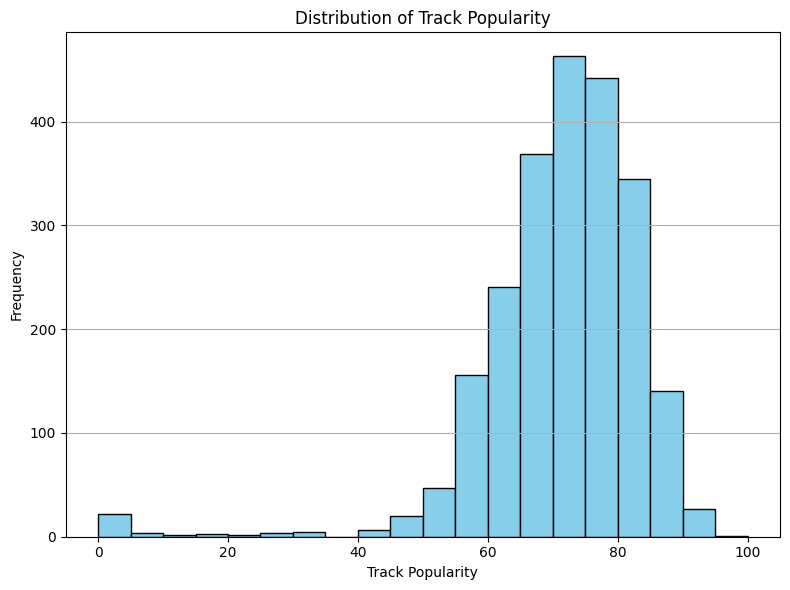

In [157]:
# Plotting the distribution of track popularity
plt.figure(figsize=(8, 6))
plt.hist(playlist_df['track_popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Looks like the the data is skewed to the left as most songs are relatively popular. We have some songs that recieve a score less then 50. This makes sense in the real world as most artists have producers and teams to establish what songs they think will be a hit or not. There is also a few songs that are recieving scores above 90. If a machine learning model can predict the score that a song will get based on the attributes above, then more artists can be achieving popularity scores above 90s. 

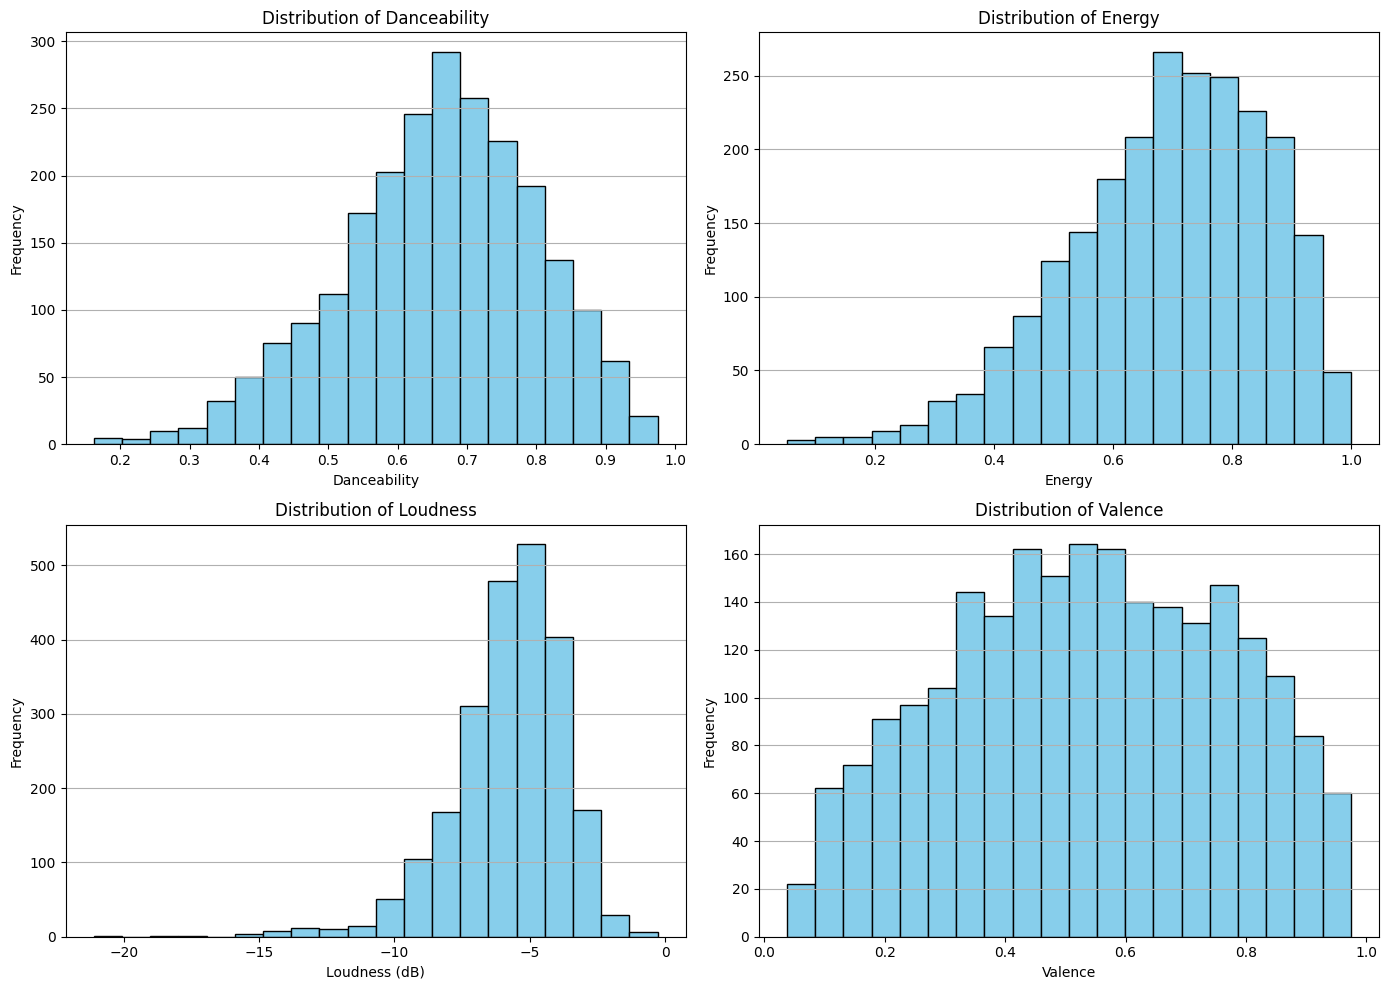

In [158]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting the distribution of danceability
axes[0, 0].hist(playlist_df['danceability'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Danceability')
axes[0, 0].set_xlabel('Danceability')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y')

# Plotting the distribution of energy
axes[0, 1].hist(playlist_df['energy'], bins=20, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Distribution of Energy')
axes[0, 1].set_xlabel('Energy')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(axis='y')

# Plotting the distribution of loudness
axes[1, 0].hist(playlist_df['loudness'], bins=20, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Distribution of Loudness')
axes[1, 0].set_xlabel('Loudness (dB)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(axis='y')

# Plotting the distribution of valence
axes[1, 1].hist(playlist_df['valence'], bins=20, color='skyblue', edgecolor='black')
axes[1, 1].set_title('Distribution of Valence')
axes[1, 1].set_xlabel('Valence')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

Loudness and Energy are two features that can be seen as skewed left. I wonder if these features play an important role in predicting the popularity scores for a given song.

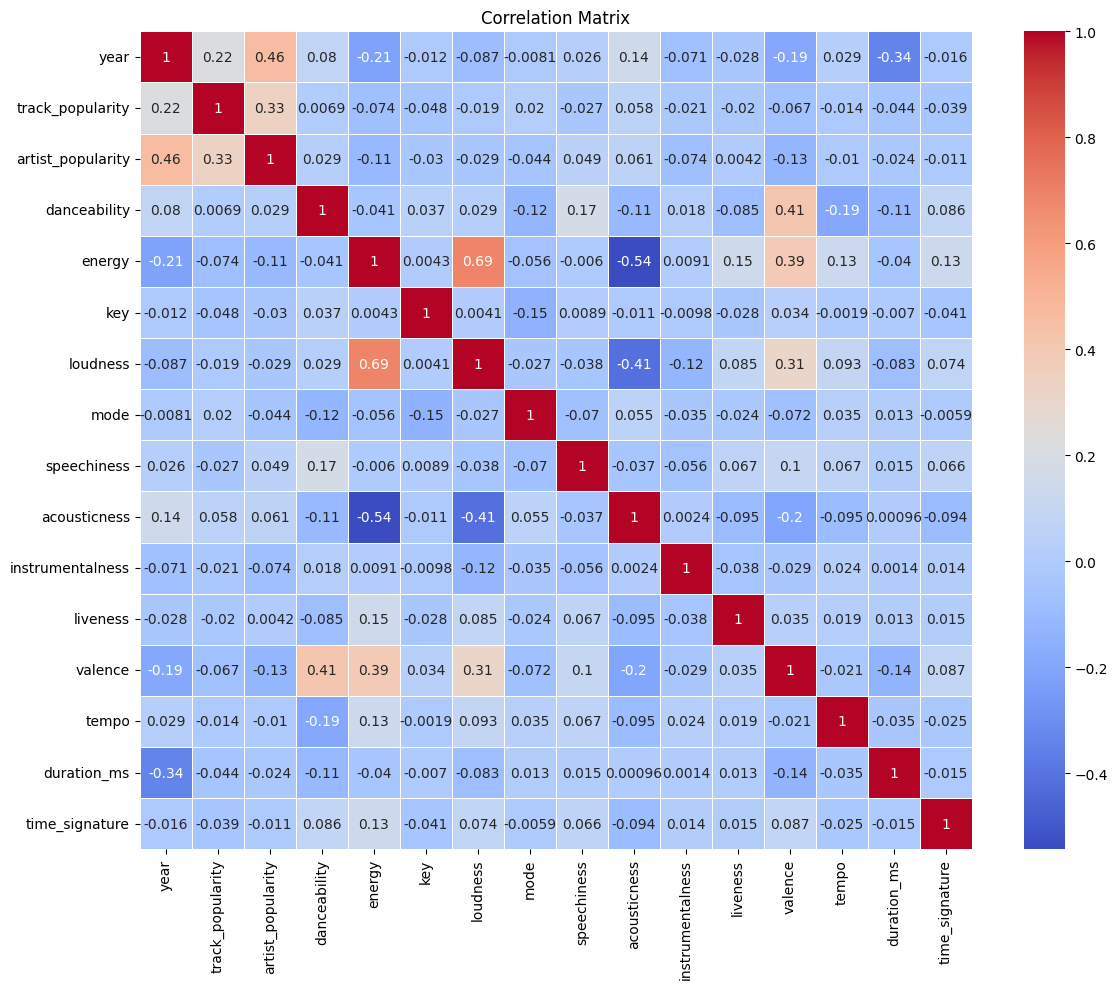

In [159]:
# Calculate the correlation matrix only for numeric columns
correlation_matrix = playlist_df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

We can tell by the correlation matrixs that loudness and energy are highely correlated with each other, however they both have a negative affect on the popularity of the song.